# 2. Summarize and visualize info from main census questions

December 22, 2024

This notebook summarizes and visualizes the main census responses (common to working/worked and students).


## Setup

To learn more, see notebook #1


In [2]:
import os

# Set working directory to root of project
current_folder = os.path.basename(os.getcwd())
if current_folder == 'notebooks':
    root_path = os.path.dirname(os.path.abspath(''))
    os.chdir(root_path)

from pprint import pprint
from src.plotter import Plotter
from src.respondent import Respondent
from src.analyst import Analyst
import src.utils as utils

from IPython import get_ipython

# Automatically reload all modules every time a line of code is executed
get_ipython().run_line_magic('load_ext', 'autoreload')
get_ipython().run_line_magic('autoreload', '2')


In [3]:
analyst = Analyst()
analyst.load_data()
analyst.build_respondents_list()

# Summarize stats for all respondents

In [4]:
res_stats = analyst.summarize_stats()
pprint(res_stats)

defaultdict(<function Analyst.summarize_stats.<locals>.<lambda> at 0x10dc76ca0>,
            {'mins_student_completed_list': [4.766666666666667,
                                             4.7,
                                             5.933333333333334,
                                             22.333333333333332,
                                             5.95,
                                             6.95,
                                             3.35,
                                             4.733333333333333,
                                             13.833333333333334,
                                             10.183333333333334,
                                             19.6,
                                             78.31666666666666,
                                             6.233333333333333,
                                             9.633333333333333,
                                             9.533333333333333,
                      

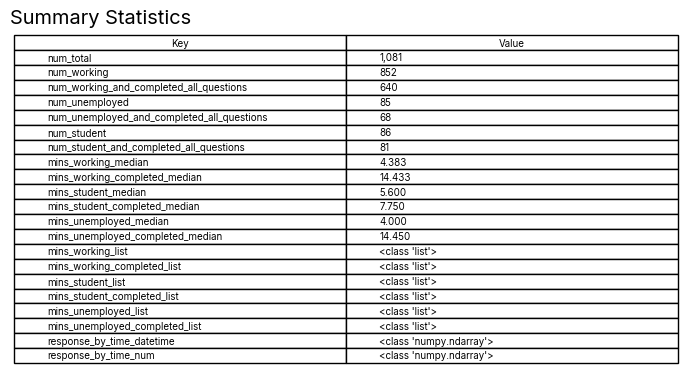

In [5]:
# Initialize plotter
plotter = Plotter()

# Summary statistics in table format
plotter.make_table_plot_from_dict(res_stats,
                                  figsize=(7,4),
                                  title='Summary Statistics',
                                  saveas='table_summary_stats.png')

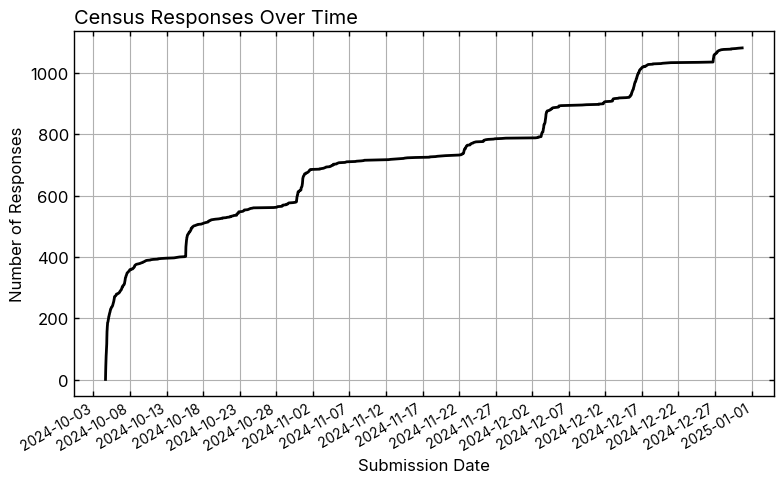

In [6]:
plotter = Plotter()

plotter.make_timeseries_plot(res_stats['response_by_time_datetime'],
                             res_stats['response_by_time_num'],
                             figsize=(8, 5),
                             title='Census Responses Over Time',
                             xlabel='Submission Date',
                             ylabel='Number of Responses',
                             saveas='census_responses_over_time.png')

In [12]:
res_census_backgrounds = analyst.summarize_census_backgrounds()
pprint(res_census_backgrounds)

{'citizenship': {'Blue Card': 1,
                 'Citizen (foreign-born)': 111,
                 'Citizen (native-born)': 617,
                 'Decline to answer': 28,
                 'Dependent visa': 1,
                 'EU Residence card': 1,
                 'European passport (German)': 1,
                 'Green Card holder': 1,
                 'Indian': 1,
                 'J1': 1,
                 'Non-citizen (F1/M1/OPT holder)': 40,
                 'Non-citizen (H-1B visa)': 50,
                 'Non-citizen (Other)': 122,
                 'Non-citizen (TN visa)': 12,
                 'Permanent': 1,
                 'Permanent resident': 2,
                 'Residence to live work, do business and remain': 1,
                 'Settlement VISA': 1,
                 '_tot_': 993,
                 'dependent': 1},
 'country': {'Algeria': 1,
             'Argentina': 4,
             'Australia': 17,
             'Austria': 3,
             'Azerbaijan': 1,
             'Belg

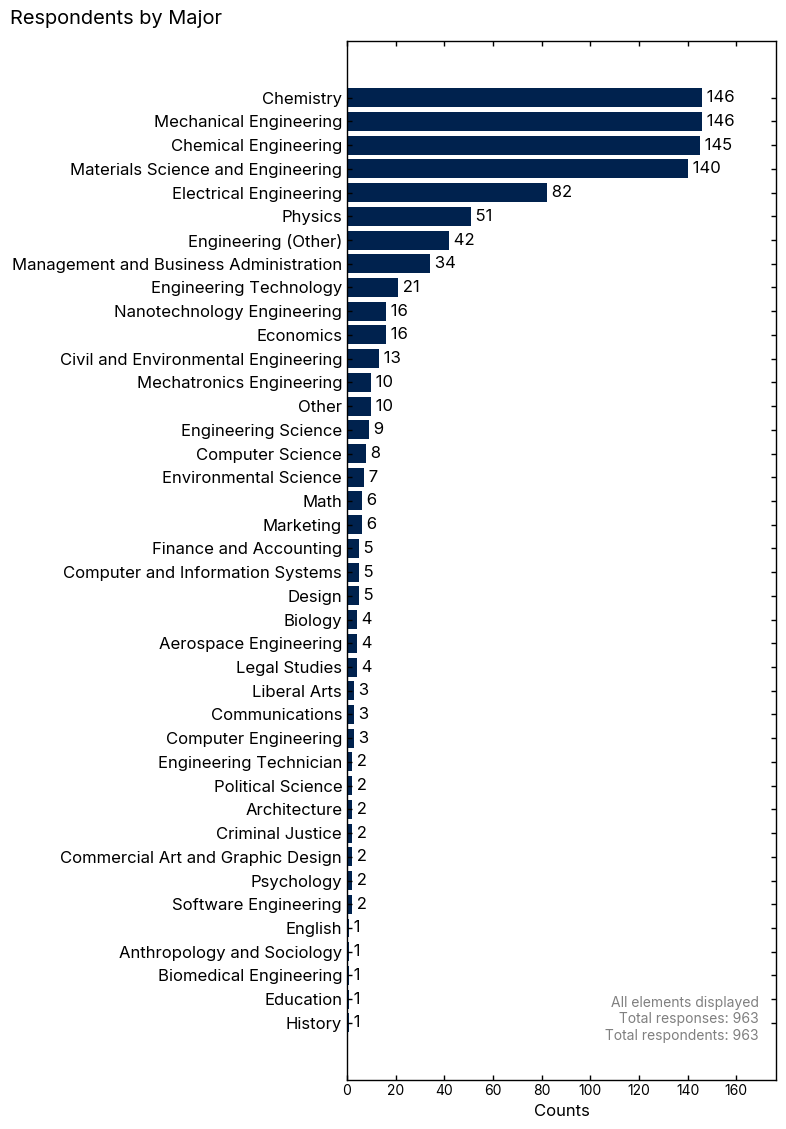

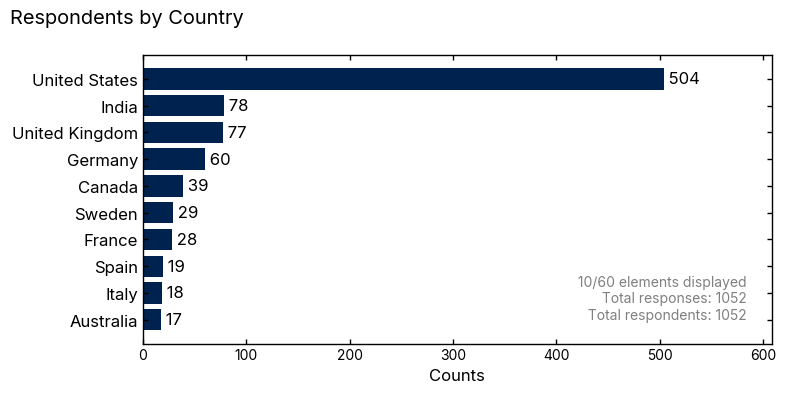

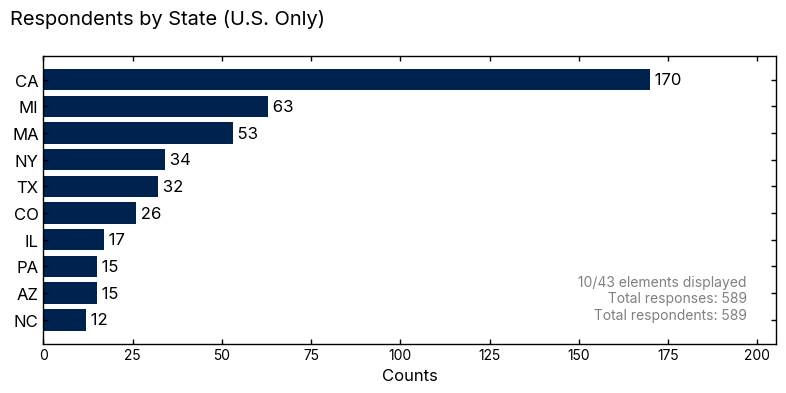

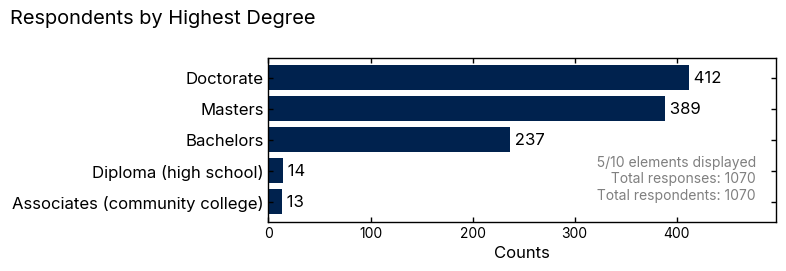

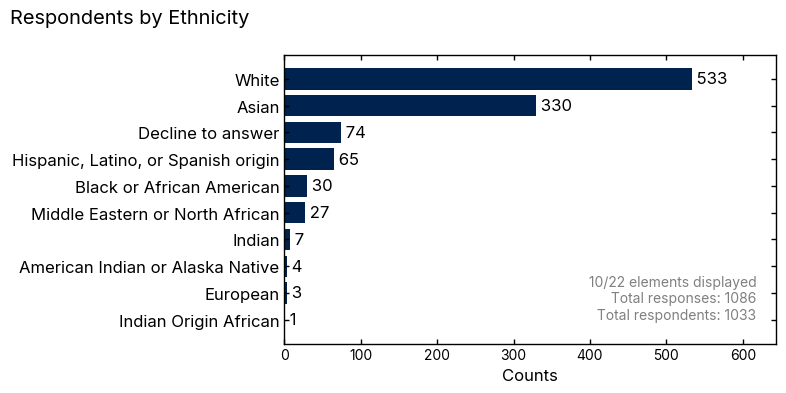

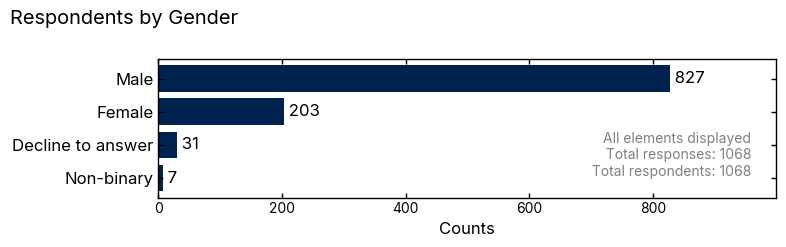

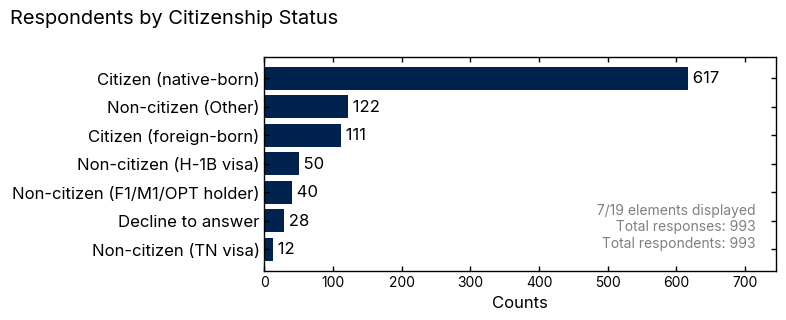

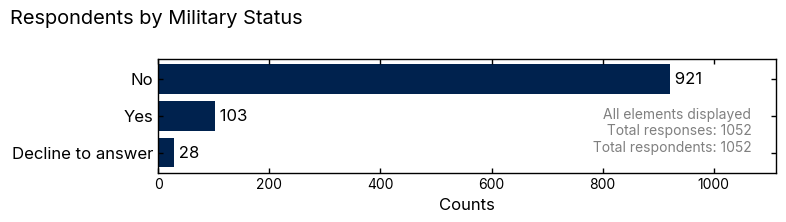

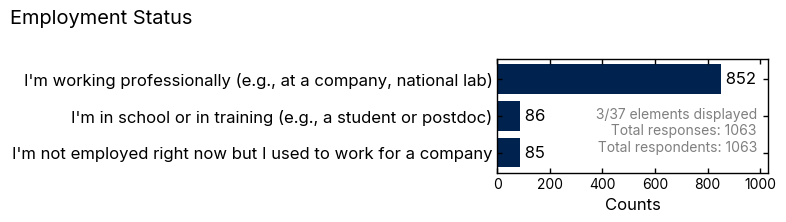

In [15]:
plotter = Plotter()
plotter.make_bar_plot_from_dict(res_census_backgrounds['degree'],
                                title='Respondents by Major',
                                saveas='respondents_major.png',
                                num_elements=500,
                                sorted=True)

plotter.make_bar_plot_from_dict(res_census_backgrounds['country'],
                                title='Respondents by Country',
                                saveas='respondents_country.png',
                                sorted=True)

plotter.make_bar_plot_from_dict(res_census_backgrounds['state'],
                                title='Respondents by State (U.S. Only)',
                                saveas='respondents_state.png',
                                exclusions=['None'],
                                sorted=True)

plotter.make_bar_plot_from_dict(res_census_backgrounds['education'],
                                title='Respondents by Highest Degree',
                                saveas='respondents_degree.png',
                                num_elements=5,
                                sorted=True)

plotter.make_bar_plot_from_dict(res_census_backgrounds['ethnicity'],
                                title='Respondents by Ethnicity',
                                saveas='respondents_ethnicity.png',
                                exclusions=['Latino', 'or Spanish origin'],
                                replacements={'Hispanic': 'Hispanic, Latino, or Spanish origin'},
                                sorted=True)

plotter.make_bar_plot_from_dict(res_census_backgrounds['gender'],
                                title='Respondents by Gender',
                                saveas='respondents_gender.png',
                                num_elements=5,
                                sorted=True)

plotter.make_bar_plot_from_dict(res_census_backgrounds['citizenship'],
                                title='Respondents by Citizenship Status',
                                saveas='respondents_citizenship.png',
                                num_elements=7,
                                sorted=True)

plotter.make_bar_plot_from_dict(res_census_backgrounds['military_status'],
                                title='Respondents by Military Status',
                                saveas='respondents_military.png',
                                sorted=True)

plotter.make_bar_plot_from_dict(res_census_backgrounds['employment_status'],
                                title='Employment Status',
                                saveas='respondents_employment.png',
                                num_elements=3,
                                sorted=True)

In [9]:
res_census_sentiment = analyst.summarize_census_sentiment()
pprint(res_census_sentiment)

{'keys': ["I feel good about what I'm working on",
          'I feel good about my career path',
          'I feel good about my work-life balance',
          'I feel valued by those around me',
          'I see opportunities for career growth'],
 'mean': array([4.06710158, 3.80729654, 3.57115928, 3.7342723 , 3.74296435]),
 'stdev': array([0.99071584, 1.06139991, 1.08362739, 1.11742455, 1.14336828]),
 'submit_time': array([Timestamp('2024-10-04 20:36:11'), Timestamp('2024-10-04 20:35:28'),
       Timestamp('2024-10-04 20:34:34'), ...,
       Timestamp('2024-12-29 20:04:40'), Timestamp('2024-12-30 04:11:30'),
       Timestamp('2024-12-30 17:02:42')], shape=(1081,), dtype=object),
 'values': array([[4., 4., 4., 4., 4.],
       [5., 4., 3., 3., 4.],
       [4., 4., 3., 4., 5.],
       ...,
       [4., 3., 4., 5., 4.],
       [4., 4., 2., 4., 4.],
       [4., 4., 3., 4., 4.]], shape=(1081, 5))}


In [10]:
res_census_skills_demand = analyst.summarize_census_skills_demand()
pprint(res_census_skills_demand)

{'skills_in_demand': ['Scale up, the ability to keep up with and foresee '
                      'research/industry trends and directions, language '
                      'abilities (Chinese, Korean, Japanese) to learn from the '
                      'bigger battery markets',
                      'Design for Reliability,   Test',
                      'Agile, Innovative, Communication',
                      'design, manufacturing, and testing',
                      'Electrochemistry, Process, Data Analysis',
                      'Scientific Observation, Data Analysis, ability to '
                      'contribute to a team',
                      'Data analysis; research and experimentation; '
                      'presentation skills',
                      'data science, manufacturing, pouch cells',
                      'Technical Knowledge; Software; Entrepreneurship',
                      'BMS, Safety, and process engineer',
                      '[cell knowledge]',
     

In [16]:

working_list = [] # includes unemployed but previously working
working_and_recruiting_list = [] # those who are working and participate in recruiting
student_list = []

for respondent in analyst.respondents_list:

    if respondent.is_working or respondent.is_unemployed:

        working_list.append(respondent)

        if respondent.company['role_level'] in ['Senior', 'Expert', 'Manager', 'Director/VP', 'Executive']:
            working_and_recruiting_list.append(respondent)

    if respondent.is_student:
        student_list.append(respondent)

print(f'Number of working respondents: {len(working_list)}')
print(f'Number of working respondents who also participate in recruiting: {len(working_and_recruiting_list)}')
print(f'Number of student respondents: {len(student_list)}')

Number of working respondents: 937
Number of working respondents who also participate in recruiting: 487
Number of student respondents: 86


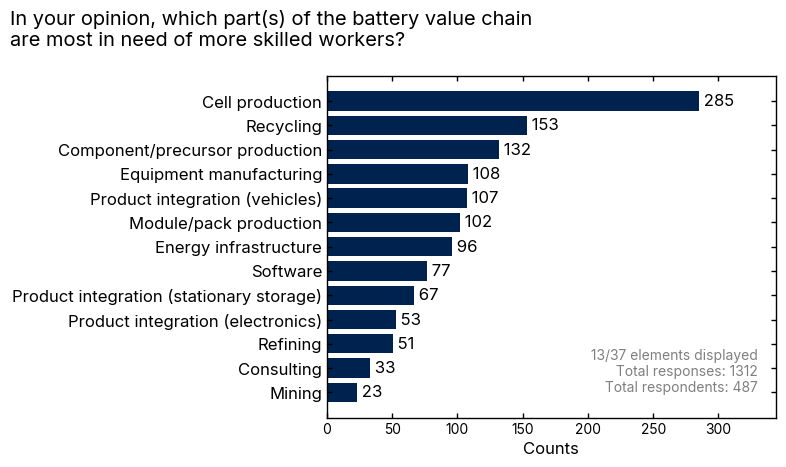

In [18]:
res_census_skills_demand = analyst.summarize_census_skills_demand(working_and_recruiting_list)

plotter.make_bar_plot_from_dict(
    res_census_skills_demand['value_chain_in_demand'],
    title='In your opinion, which part(s) of the battery value chain \nare most in need of more skilled workers?',
    saveas='census_value_chain_in_demand.png',
    num_elements=13,
    exclusions=['mobility)'],
    sorted=True,
    replacements={'Product integration (vehicles' : 'Product integration (vehicles)'})